SSDSEデータセットを知るための最初の分析

In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv('SSDSE-A-2024.csv', encoding = 'shift-jis')

In [13]:
#どんなモデルを作るのにも必要なデータ加工

new_header = df.iloc[1]  # ヘッダーに設定する行を抽出
df = df[2:]  # ヘッダー以外を除外
df.columns = new_header # ヘッダーを設定

df = df.drop(columns = '地域コード') # 不要な列を削除


In [14]:
#出生率の定義, 出生率を定義できない行の削除

fr = pd.DataFrame({
    'fertility_rate': pd.to_numeric(df['出生数'], errors='coerce') / pd.to_numeric(df['15〜64歳人口'], errors='coerce')
    })  # fertility rate を定義

#inf_rows = fr[np.isinf(fr['fertility_rate'])] #403行目が無限大になる
fr['fertility_rate'] = fr['fertility_rate'].replace([np.inf, -np.inf], np.nan) #403行目を一旦NaNに置き換え
fr = fr.dropna(subset = ['fertility_rate']) #403行目を除去
df = df.drop(index = 403) #元データセットの403行目も使わないので除去

出生率を重回帰モデルで予測

In [15]:
df

1,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,...,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数（基本票）
2,北海道,札幌市,1973395,918682,1054713,1933094,897727,1035367,215366,110196,...,10370,7354,348,177,1413,1206,6978,2142,5758,368
3,北海道,函館市,251084,113965,137119,248208,112718,135490,23560,11984,...,2163,1256,41,26,206,122,822,182,683,54
4,北海道,小樽市,111299,50136,61163,109971,49441,60530,9169,4678,...,1097,616,17,11,79,78,338,105,334,23
5,北海道,旭川市,329306,152108,177198,325287,150318,174969,34691,17797,...,2409,1503,67,33,227,170,1364,246,876,72
6,北海道,室蘭市,82383,40390,41993,81658,39960,41698,7769,3916,...,621,447,13,6,52,39,249,56,193,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,沖縄県,久米島町,7192,3823,3369,7152,3802,3350,1075,568,...,87,65,0,1,3,1,5,1,12,4
1739,沖縄県,八重瀬町,30941,15244,15697,30805,15148,15657,5977,3047,...,153,55,3,1,14,8,82,16,47,14
1740,沖縄県,多良間村,1058,575,483,1047,574,473,150,80,...,14,5,0,0,1,1,1,2,0,1
1741,沖縄県,竹富町,3942,2033,1909,3898,2013,1885,707,362,...,58,71,0,0,15,3,6,2,0,0


In [5]:
#重回帰モデルを作るのに必要なデータ加工
a = df.loc[:, '都道府県':'15歳未満人口（女）'].columns
b = df.loc[:, '15〜64歳人口（男）':'外国人人口'].columns
c = df['世帯数'].name
d = df.loc[:, '事業所数（民営）（農業、林業）':'事業所数（民営）（サービス業（他に分類されないもの））'].columns
e = df.loc[:, '従業者数（民営）（農業、林業）':'従業者数（民営）（サービス業（他に分類されないもの））'].columns
f = df['一般行政部門職員数（市区町村）'].name
g = df.loc[:, '総人口（非水洗化人口＋水洗化人口）':'非水洗化人口'].columns

df_mul = df.drop(columns = list(a) + list(b) + [c] + list(d) + list(e) + [f] + list(g))
df_mul

1,15〜64歳人口,出生数,死亡数,転入者数（日本人移動者）,転出者数（日本人移動者）,一般世帯数,一般世帯人員数,核家族世帯数,単独世帯数,65歳以上の世帯員のいる核家族世帯数,...,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数（基本票）
2,1185724,11988,21931,114194,105217,967372,1916478,496691,422160,195527,...,10370,7354,348,177,1413,1206,6978,2142,5758,368
3,134953,1174,4050,7599,8401,121455,240342,62606,50901,30158,...,2163,1256,41,26,206,122,822,182,683,54
4,55643,422,1969,2876,3225,52615,106082,28930,20657,15757,...,1097,616,17,11,79,78,338,105,334,23
5,178060,1848,4713,9375,9792,155625,315003,86206,61540,39798,...,2409,1503,67,33,227,170,1364,246,876,72
6,43398,409,1297,2715,3410,41660,79836,20845,18890,10730,...,621,447,13,6,52,39,249,56,193,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,3965,73,117,390,506,3332,7040,1664,1400,751,...,87,65,0,1,3,1,5,1,12,4
1739,17990,359,300,1650,1180,10641,29802,7338,2320,2489,...,153,55,3,1,14,8,82,16,47,14
1740,585,3,14,58,60,466,1058,260,175,127,...,14,5,0,0,1,1,1,2,0,1
1741,2308,38,40,573,587,2089,3910,833,1150,295,...,58,71,0,0,15,3,6,2,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_mul.drop(columns = '出生数')
columns = X.columns #トップ10表示のためにカラム名を一旦コピー
y = fr

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns) #ここでペースト

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('y_pred = \n', y_pred,
      '\nmse =', mse)


y_pred = 
 [[ 0.00903627]
 [ 0.00961945]
 [ 0.0093438 ]
 [ 0.01387682]
 [ 0.00962969]
 [ 0.00965924]
 [ 0.0102323 ]
 [ 0.00995053]
 [ 0.01042751]
 [ 0.00970789]
 [ 0.00495913]
 [ 0.00999038]
 [ 0.00749476]
 [ 0.00948474]
 [ 0.01192933]
 [ 0.00996652]
 [ 0.01181733]
 [ 0.01328214]
 [ 0.00925443]
 [ 0.00925776]
 [ 0.01147232]
 [ 0.00907535]
 [ 0.00922075]
 [ 0.01090234]
 [ 0.01046905]
 [ 0.01008048]
 [ 0.00966918]
 [ 0.01014213]
 [ 0.01160072]
 [ 0.01051134]
 [ 0.00960164]
 [ 0.00928107]
 [ 0.01196793]
 [ 0.009452  ]
 [ 0.01014895]
 [ 0.00932896]
 [ 0.0107195 ]
 [ 0.01062065]
 [ 0.0105992 ]
 [ 0.00909075]
 [ 0.00840517]
 [ 0.00988867]
 [ 0.00453464]
 [ 0.00992015]
 [ 0.00943382]
 [ 0.00958256]
 [ 0.00975393]
 [ 0.00900113]
 [ 0.00934704]
 [ 0.00973524]
 [ 0.0100199 ]
 [ 0.00923189]
 [ 0.00716928]
 [ 0.00969672]
 [ 0.01195451]
 [ 0.01329328]
 [ 0.01033537]
 [ 0.01025027]
 [ 0.00863666]
 [ 0.01038595]
 [ 0.0098591 ]
 [ 0.00923875]
 [ 0.00977822]
 [ 0.01165123]
 [ 0.00922861]
 [ 0.01047847]

In [ ]:
#出生率を説明できる変数ランキング
coef_df = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : np.abs(model.coef_).ravel()
})
coef_df_top = coef_df.sort_values(by = 'Coefficient', ascending = False).head(10)
print(coef_df_top[['Feature', 'Coefficient']])

           Feature  Coefficient
53       第３次産業就業者数     0.060977
43         就業者数（男）     0.027292
42            就業者数     0.026455
5          一般世帯人員数     0.025530
44         就業者数（女）     0.025422
32          小学校児童数     0.016587
52       第２次産業就業者数     0.015889
23   歳出決算総額（市町村財政）     0.010357
6           核家族世帯数     0.010122
10  65歳以上世帯員の単独世帯数     0.008942


出生率を回帰木で予測

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop(columns = ['出生数', '都道府県', '市区町村']) #理論上決定木では文字列を扱えるが, sklearnの決定木では扱えないため除去
y = fr['fertility_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = DecisionTreeRegressor(max_depth = 5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse =', mse)


mse = 9.738206349479415e-06


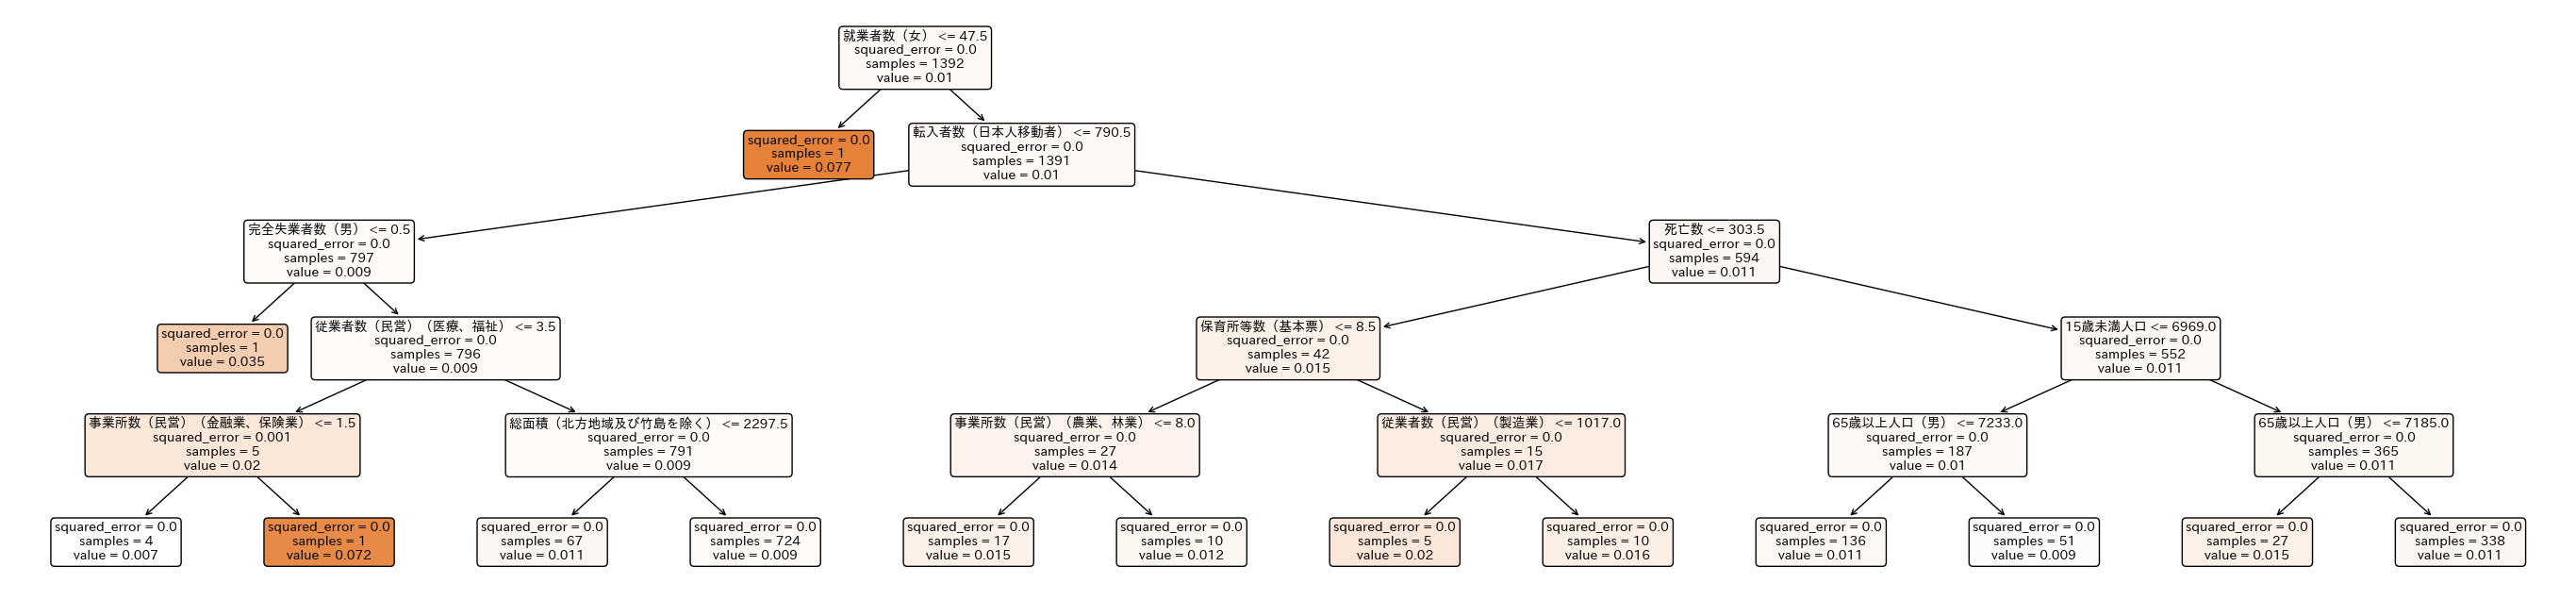

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import japanize_matplotlib


plt.figure(figsize=(35, 8))
plot_tree(
    model, 
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.show()

In [ ]:
#過学習を考慮するためCCPによる剪定を行う
